In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
color=plt.rcParams["axes.prop_cycle"].by_key()['color']
color_cycle=cycle(plt.rcParams["axes.prop_cycle"].by_key()['color'])


In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/2k0v11/Dataset/main/customer_shopping_data.csv?token=GHSAT0AAAAAACIE3BYYLOOGXNFKPLQICZKGZJCRFVQ")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


# Exploratory Data Analysis


In [6]:
df.describe().T.style.background_gradient(axis=1,cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
age,99457.000000,43.427089,14.990054,18.000000,30.000000,43.000000,56.000000,69.000000
quantity,99457.000000,3.003429,1.413025,1.000000,2.000000,3.000000,4.000000,5.000000
price,99457.000000,689.256321,941.184567,5.230000,45.450000,203.300000,1200.320000,5250.000000


In [7]:
df.isna().sum()/len(df)

invoice_no        0.0
customer_id       0.0
gender            0.0
age               0.0
category          0.0
quantity          0.0
price             0.0
payment_method    0.0
invoice_date      0.0
shopping_mall     0.0
dtype: float64

No null value in the dataset


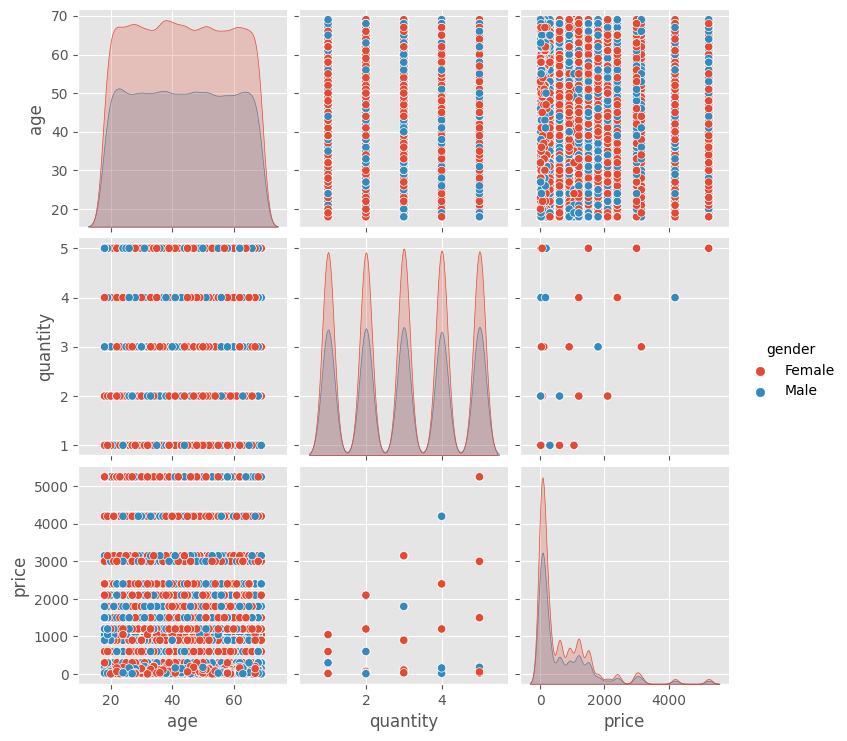

In [8]:
sns.pairplot(df,hue='gender')

In [9]:
for i in df.columns:
    print(i,'->',df[i].nunique())

invoice_no -> 99457
customer_id -> 99457
gender -> 2
age -> 52
category -> 8
quantity -> 5
price -> 40
payment_method -> 3
invoice_date -> 797
shopping_mall -> 10


In [10]:
print("The Gender in the dataset",end='')
print(df['gender'].unique())
print("The Category in the dataset",end='')
print(df['category'].unique())
print("The Payment methods in the dataset",end='')
print(df['payment_method'].unique())
print("The shopping malls in the dataset",end='')
print(df['shopping_mall'].unique())

The Gender in the dataset['Female' 'Male']
The Category in the dataset['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
The Payment methods in the dataset['Credit Card' 'Debit Card' 'Cash']
The shopping malls in the dataset['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']


<Axes: >

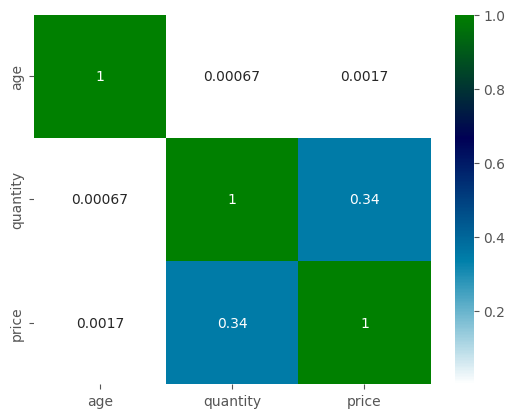

In [11]:
sns.heatmap(df.corr(),annot=True,cmap='ocean_r')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'quantity'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

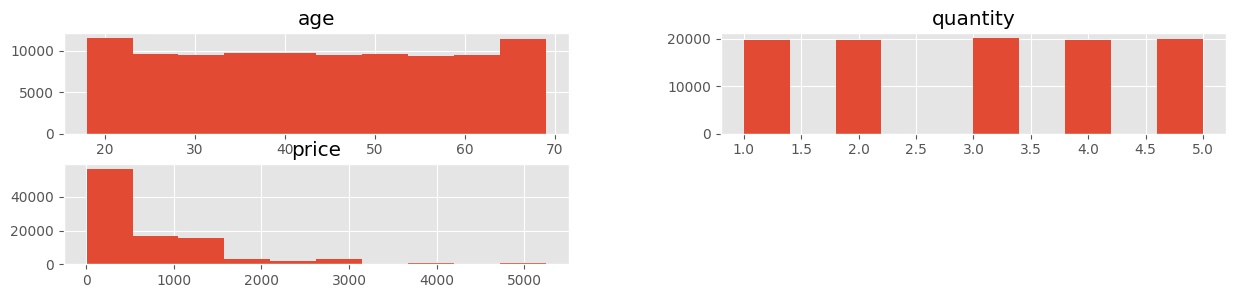

In [12]:
df.hist(figsize=(15,3))

Category count

Text(0, 0.5, 'Count of the value')

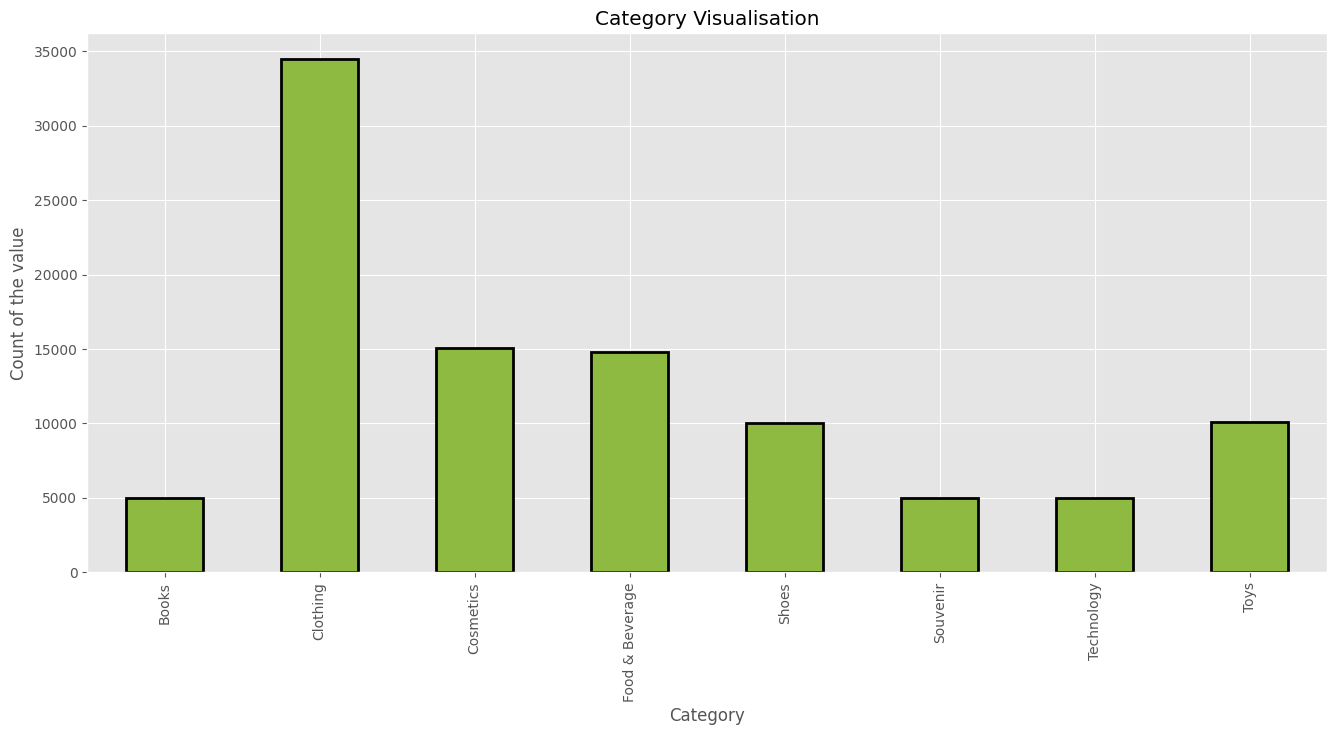

In [16]:
ax=df['category'].value_counts().sort_index().plot(kind='bar',title='Category Visualisation',figsize=(16,7),color=color[5],edgecolor='black',linewidth=2)
ax.set_xlabel("Category")
ax.set_ylabel("Count of the value")

Gender Visualisation

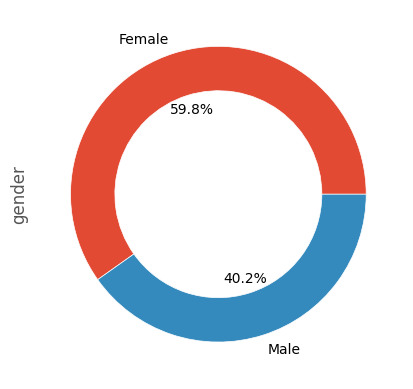

In [20]:
gender=df['gender'].value_counts().plot(kind='pie',labels=df['gender'].value_counts().index,autopct='%1.1f%%',wedgeprops=dict(width=0.3,edgecolor='w'))

In [25]:
# each age gender distribution
df.groupby('age')['gender'].value_counts().sort_index().unstack().style.background_gradient(axis=0,cmap='YlOrRd')

gender,Female,Male
age,,
18,1079,765
19,1133,803
20,1102,742
21,1166,781
22,1208,843
23,1095,802
24,1155,822
25,1144,719
26,1156,740


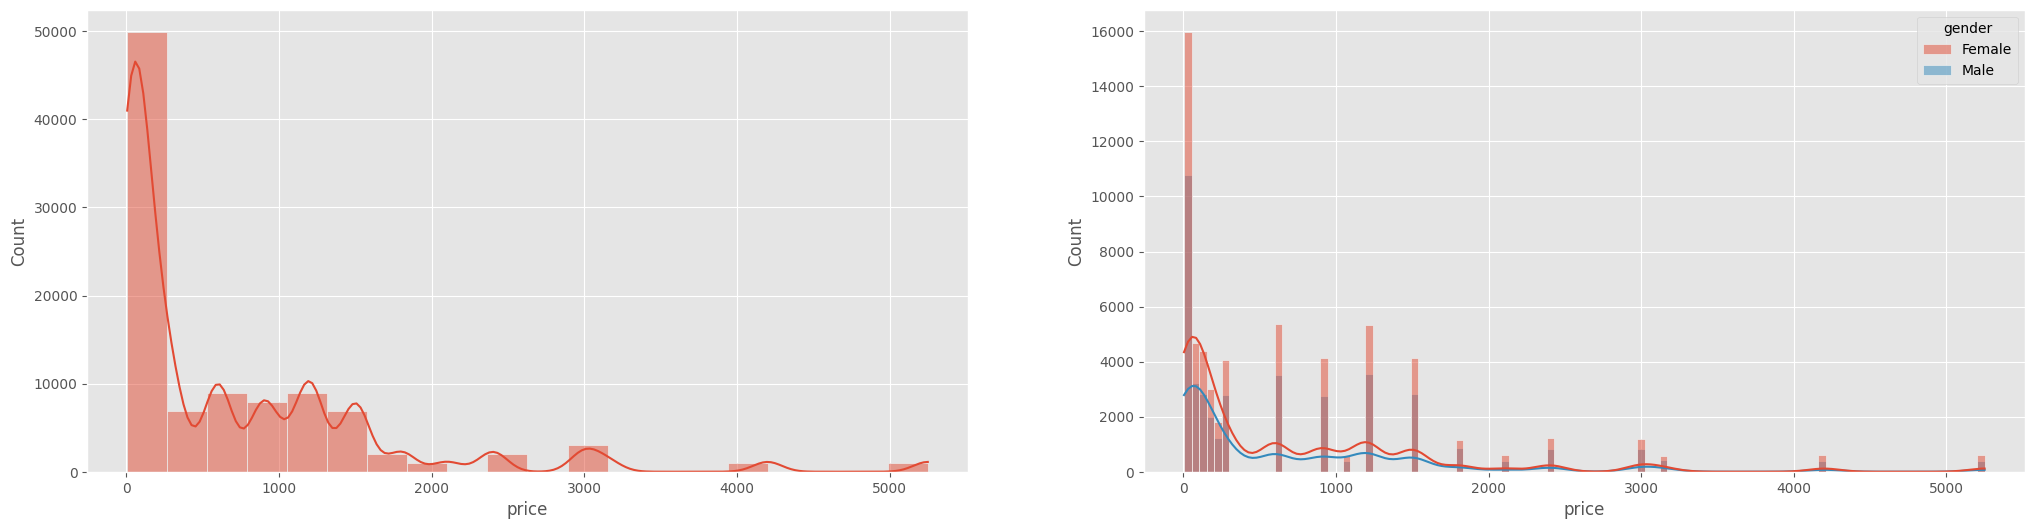

In [27]:
# Price distribution along with gender
plt.subplots(1,2,figsize=(25,6))
plt.subplot(121)
sns.histplot(data=df,bins=20,x='price',kde=True)
plt.subplot(122)
sns.histplot(data=df,x='price',kde=True,hue='gender')
plt.show()

In [30]:
def ages(a):
   if a>=65:
    return "Senior aged"
   elif a>=45:
    return "Middle aged"
   else:
    return "Adult age"
df['Age_category']=df['age'].apply(ages)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Age_category
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon,Adult age
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul,Adult age
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity,Adult age
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM,Senior aged
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon,Middle aged


In [32]:
# Finding the total amount of the each category with respective payment methods
df.groupby('payment_method')['category'].value_counts().sort_index().unstack().style.background_gradient(axis=0,cmap='RdBu_r')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
payment_method,,,,,,,,
Cash,2268,15456,6674,6587,4474,2211,2235,4542
Credit Card,1696,12025,5336,5250,3553,1770,1753,3548
Debit Card,1017,7006,3087,2939,2007,1018,1008,1997


In [42]:
# Extract year, month, day from invoice date
df['invoice_date']=pd.to_datetime(df['invoice_date'])
df['date']=df['invoice_date'].dt.year
df['month']=df['invoice_date'].dt.month
df['day']=df['invoice_date'].dt.day

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Age_category,date,month,day
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,Adult age,2022,5,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,Adult age,2021,12,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,Adult age,2021,9,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,Senior aged,2021,5,16
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,Middle aged,2021,10,24


In [41]:
df.drop('invoice_date',axis=1) # Removing the invoice date

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,Age_category,date,month,day
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,Adult age,2022,5,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,Adult age,2021,12,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,Adult age,2021,9,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,Senior aged,2021,5,16
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,Middle aged,2021,10,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,Middle aged,2022,9,21
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,Adult age,2021,9,22
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity,Middle aged,2021,3,28
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,Istinye Park,Middle aged,2021,3,16


Text(0, 0.5, 'count of values')

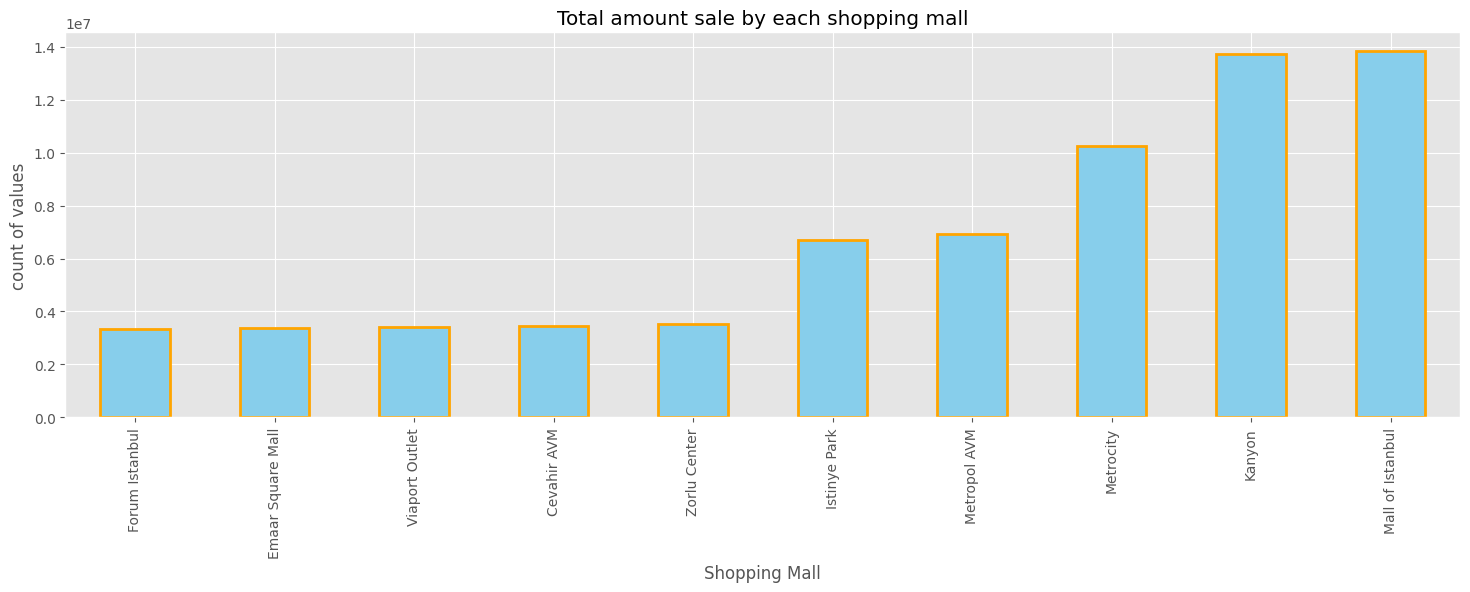

In [36]:
# Sales by shopping mall
mall=df.groupby('shopping_mall')['price'].sum().sort_index()\
.sort_values(ascending=True)\
.plot(kind='bar',title='Total amount sale by each shopping mall',figsize=(18,5),color='skyblue',edgecolor='orange',linewidth=2)
mall.set_xlabel('Shopping Mall')
mall.set_ylabel('count of values')

In [44]:
# Shopping mall with payment method with price
pay = df.groupby(['payment_method','shopping_mall'])[['price']].sum().sort_index().unstack().style.background_gradient(axis=0,cmap='vlag_r')
pay

In [37]:
# Shopping category based on Age category
df.groupby('Age_category')['category'].value_counts().sort_index().unstack().style.background_gradient(cmap='Reds')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
Age_category,,,,,,,,
Adult age,2570,18040,7802,7779,5196,2637,2653,5301
Middle aged,1936,13206,5859,5594,3898,1898,1862,3799
Senior aged,475,3241,1436,1403,940,464,481,987
